## Importing the Libraries

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##  Load the Dataset

In [ ]:

df = pd.read_csv('Dataset for PMV Prediction.csv')
print(df.head())


   Season            Climate Building type   Clo  Met  Air temperature (C)  \
0  Summer  Humid subtropical        Office  0.57  1.0                 24.3   
1  Summer  Humid subtropical        Office  0.57  1.1                 25.7   
2  Summer  Humid subtropical        Office  0.57  1.1                 24.6   
3  Summer  Humid subtropical        Office  0.57  1.0                 26.4   
4  Summer  Humid subtropical        Office  0.57  1.0                 25.0   

   Relative humidity (%)  Air velocity (m/s)  \
0                   36.8                0.27   
1                   33.1                0.09   
2                   34.9                0.06   
3                   31.7                0.13   
4                   33.3                0.07   

   Outdoor monthly air temperature (C)  PMV  
0                                 32.8 -1.1  
1                                 32.8 -0.1  
2                                 32.8 -0.4  
3                                 32.8 -0.3  
4           

In [3]:
# Set Seaborn style
sns.set(style="whitegrid")

### Pairplot to visualize relationships

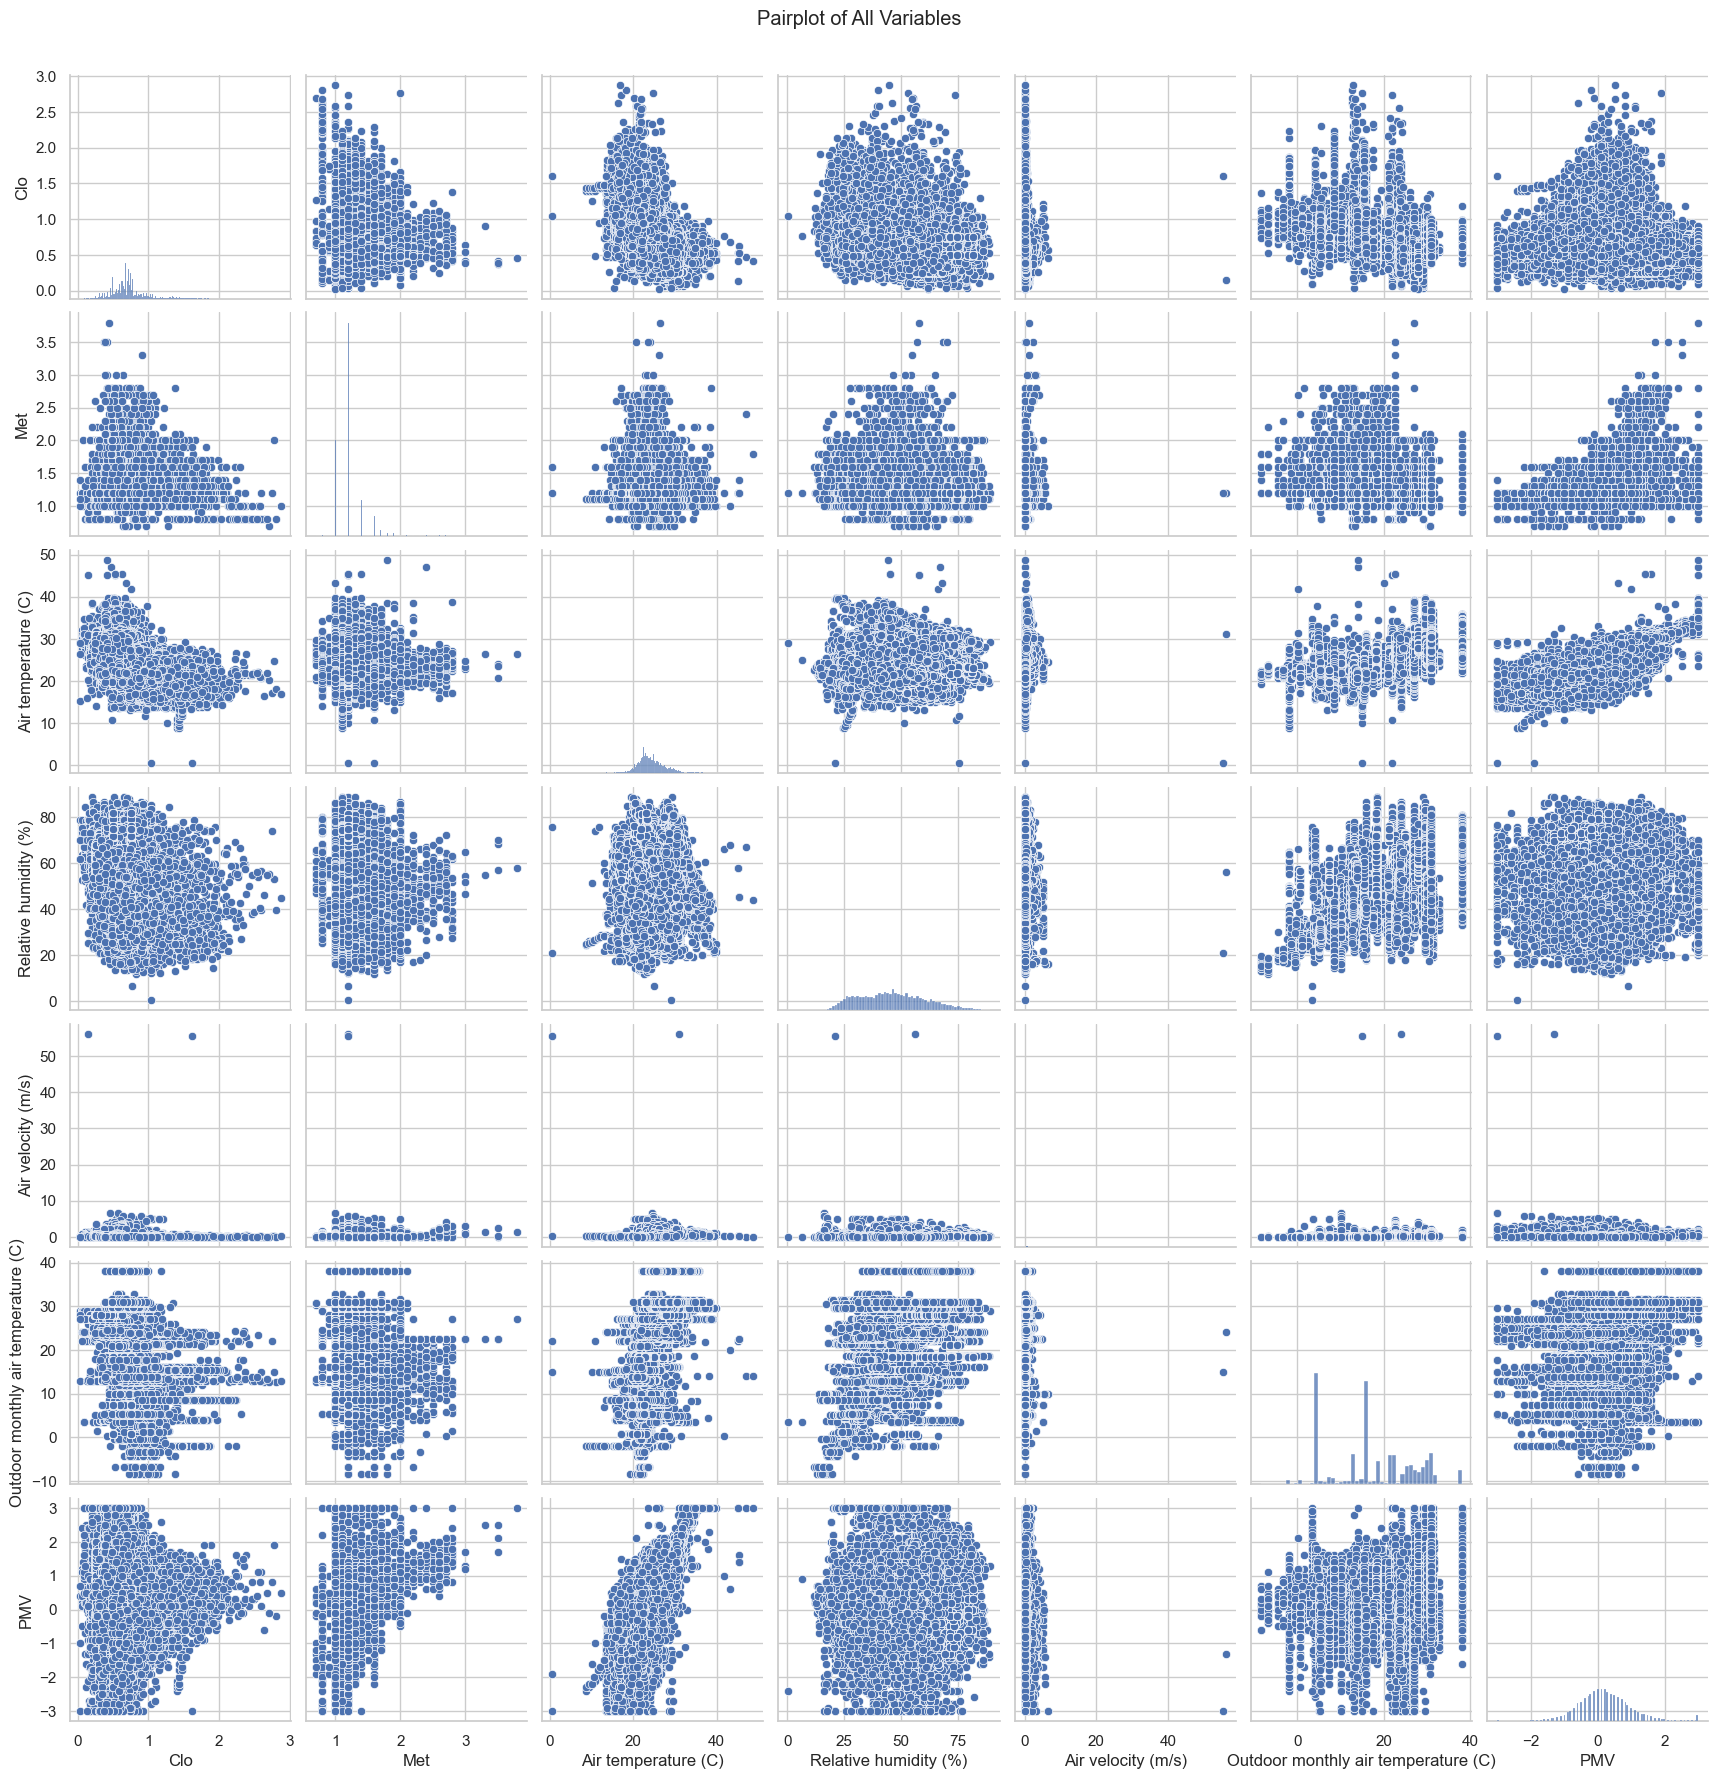

In [ ]:

sns.pairplot(df)
plt.suptitle("Pairplot of All Variables", y=1.02)
plt.show()

### Heatmap Visualization

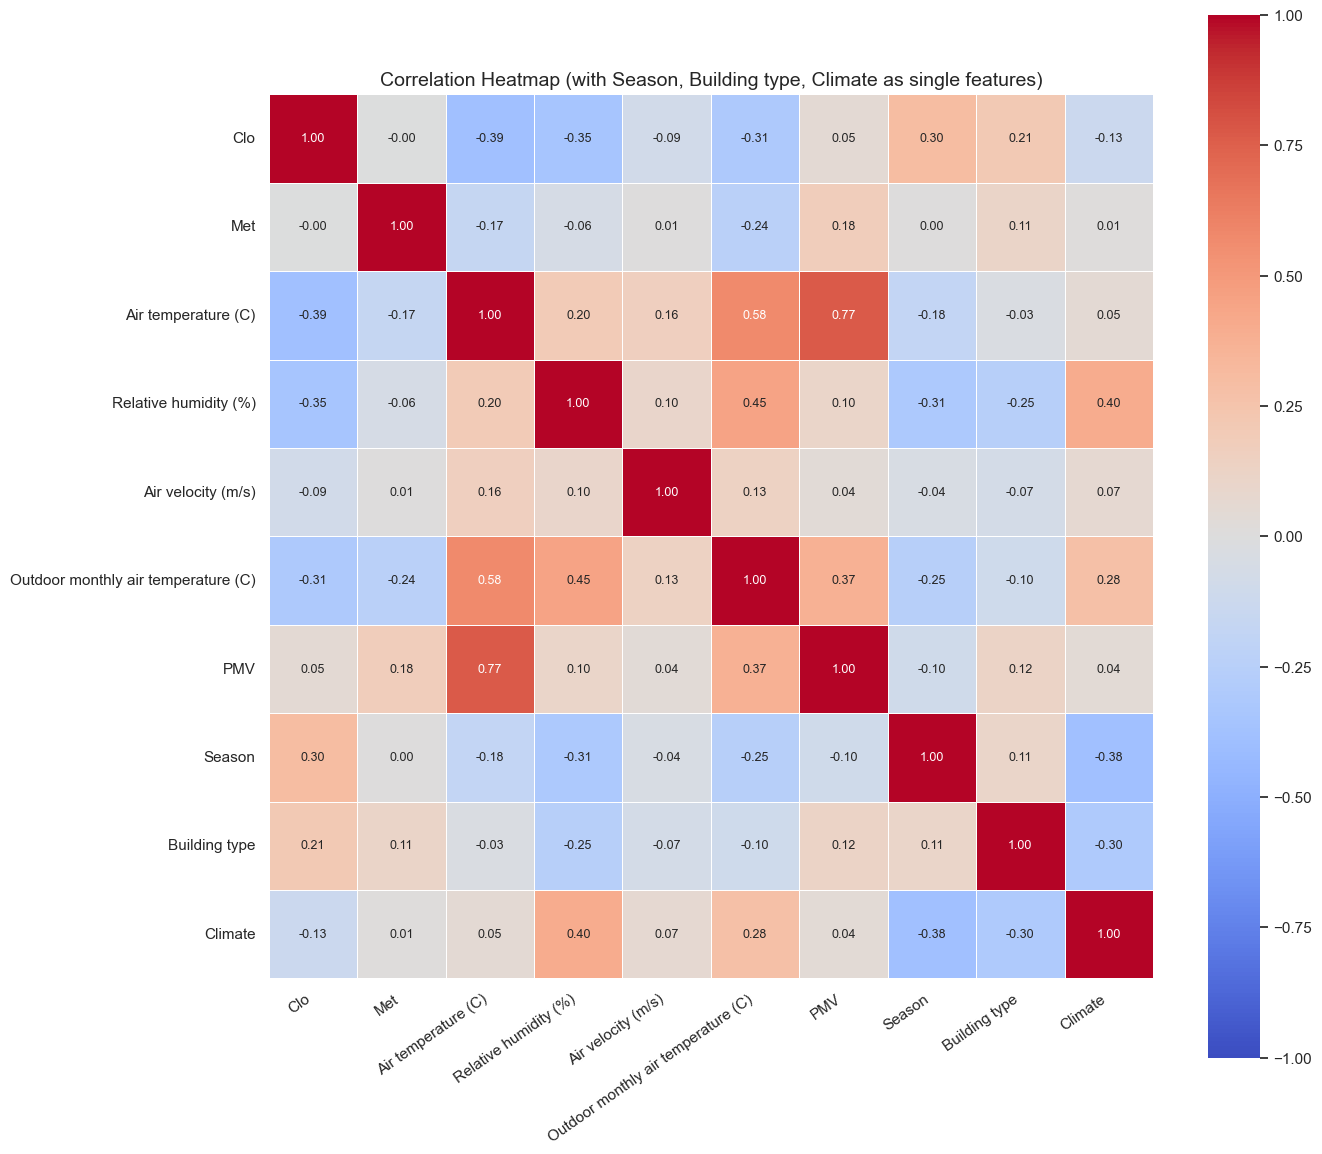

In [ ]:

# 1) Collapse one-hot groups into single integer-coded columns ----
def collapse_onehot_to_code(df, prefix):
    """Collapse one-hot columns starting with prefix+'_' into a single integer code.
       Returns the new code series and the list of columns that were used."""
    cols = [c for c in df.columns if c.startswith(prefix + "_")]
    if not cols:  # if the original categorical column already exists
        if prefix in df.columns:
            # ensure it's categorical codes
            return df[prefix].astype("category").cat.codes, []
        else:
            return pd.Series(index=df.index, dtype='float64'), []
    mat = df[cols].to_numpy(dtype=float)
    # argmax over one-hot; if a row is all-zeros, set NaN
    codes = mat.argmax(axis=1)
    zero_rows = (mat.sum(axis=1) == 0)
    codes = codes.astype(float)
    codes[zero_rows] = np.nan
    return pd.Series(codes, index=df.index, name=prefix), cols

df_plot = df.copy()

# collapse one-hot columns
season_code, season_cols = collapse_onehot_to_code(df_plot, "Season")
btype_code, btype_cols = collapse_onehot_to_code(df_plot, "Building type")
clim_code,  clim_cols  = collapse_onehot_to_code(df_plot, "Climate")

df_plot["Season"] = season_code
df_plot["Building type"] = btype_code
df_plot["Climate"] = clim_code

# drop old dummy columns
to_drop = season_cols + btype_cols + clim_cols
df_plot = df_plot.drop(columns=to_drop, errors="ignore")

# ---- 2) Pick the 10 variables you want in the heatmap ----
desired_order = [
    "Clo", "Met", "Air temperature (C)", "Relative humidity (%)",
    "Air velocity (m/s)", "Outdoor monthly air temperature (C)", "PMV",
    "Season", "Building type", "Climate"
]
cols_for_corr = [c for c in desired_order if c in df_plot.columns]

# ---- 3) Correlation & heatmap ----
df_corr = df_plot[cols_for_corr].apply(pd.to_numeric, errors="coerce")
corr = df_corr.corr()

n = len(cols_for_corr)
plt.figure(figsize=(min(1.1*n + 3, 22), min(1.1*n + 3, 22)))
ax = sns.heatmap(
    corr, annot=True, fmt=".2f",
    cmap="coolwarm", vmin=-1, vmax=1,
    square=True, linewidths=0.7,
    cbar_kws={"shrink": 0.8}, annot_kws={"size": 9}
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=35, ha="right")
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
plt.title("Correlation Heatmap (with Season, Building type, Climate as single features)", fontsize=14)
plt.tight_layout()
plt.show()








### Scatterplots for selected inputs vs PMV

In [ ]:

input_vars = [ "Clo",
    "Met",
    "Air temperature (C)",
    "Relative humidity (%)",
    "Air velocity (m/s)",
    "Outdoor monthly air temperature (C)","Season", "Building type", "Climate"]

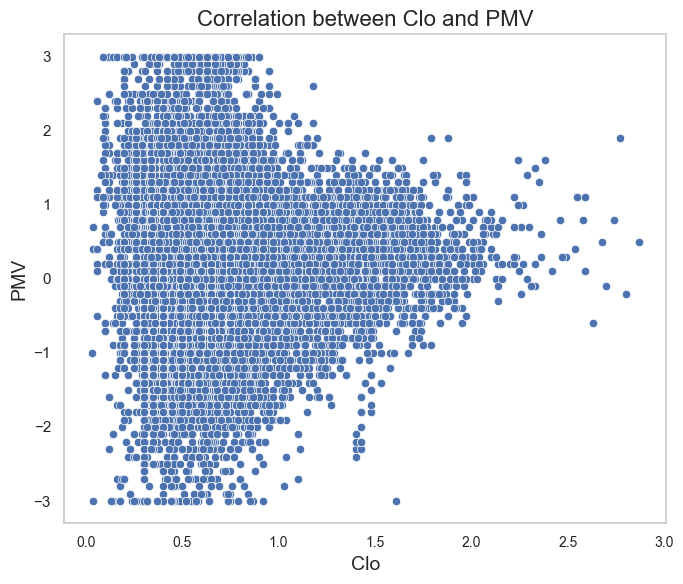

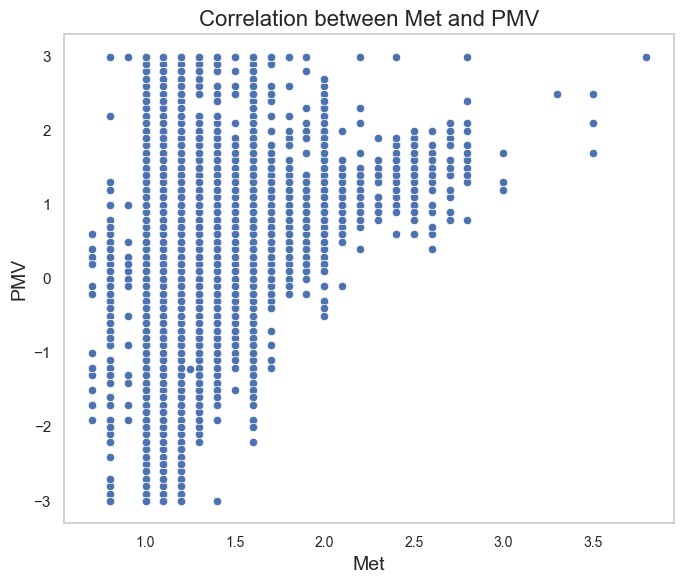

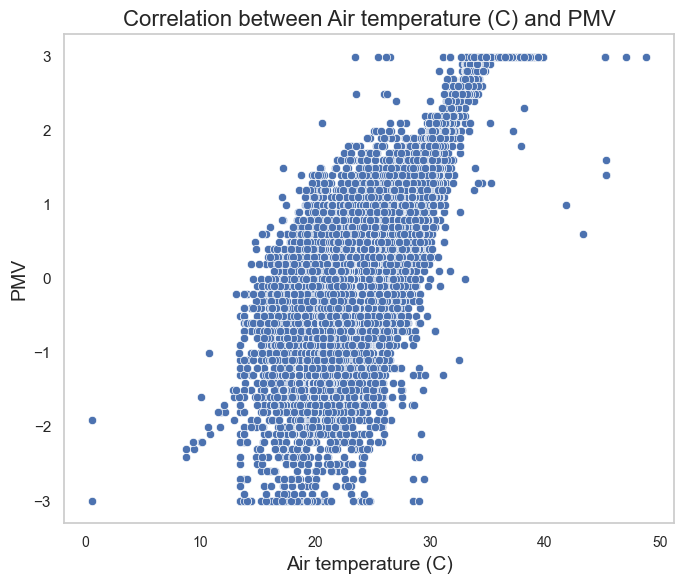

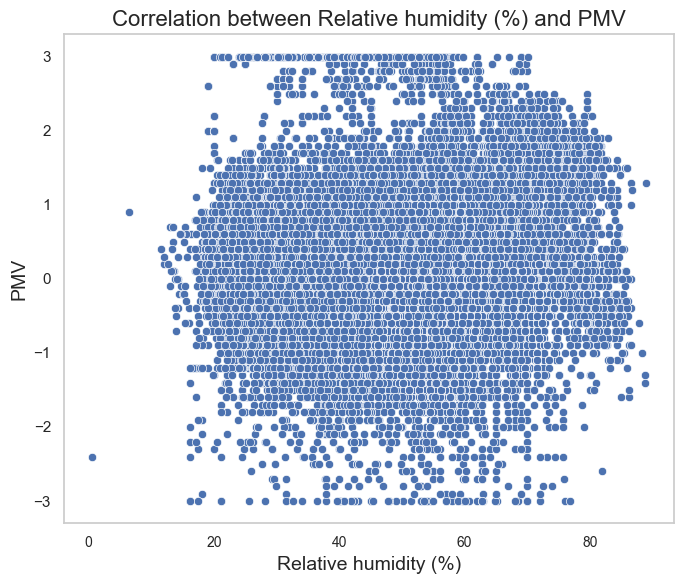

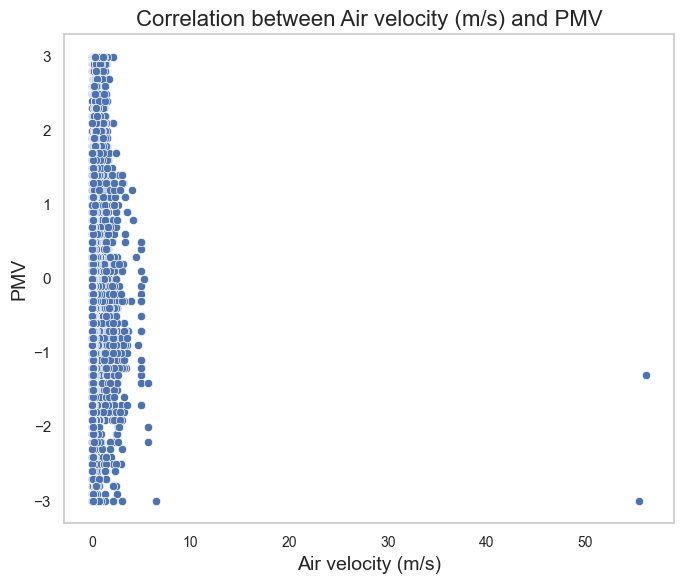

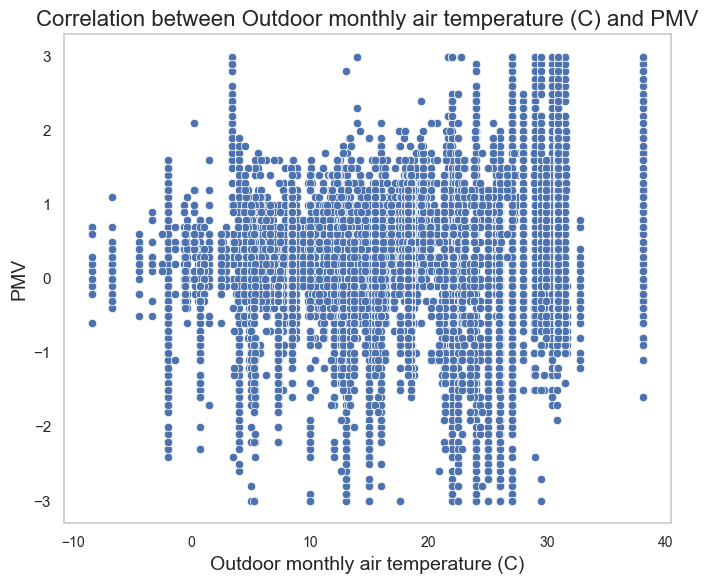

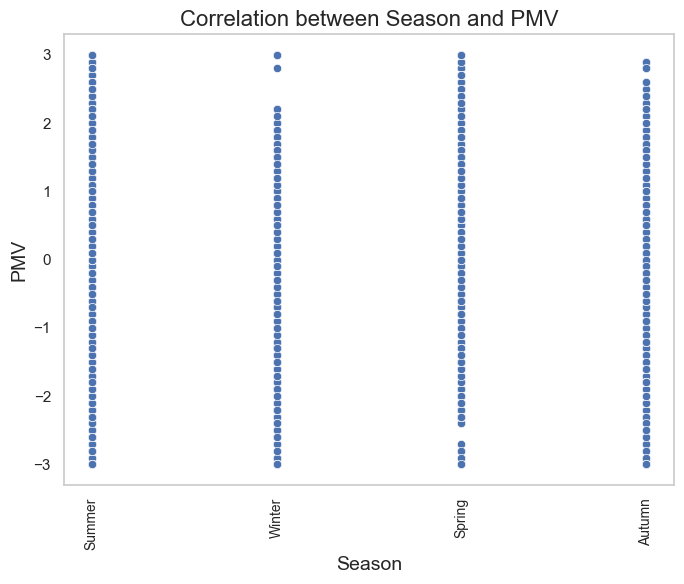

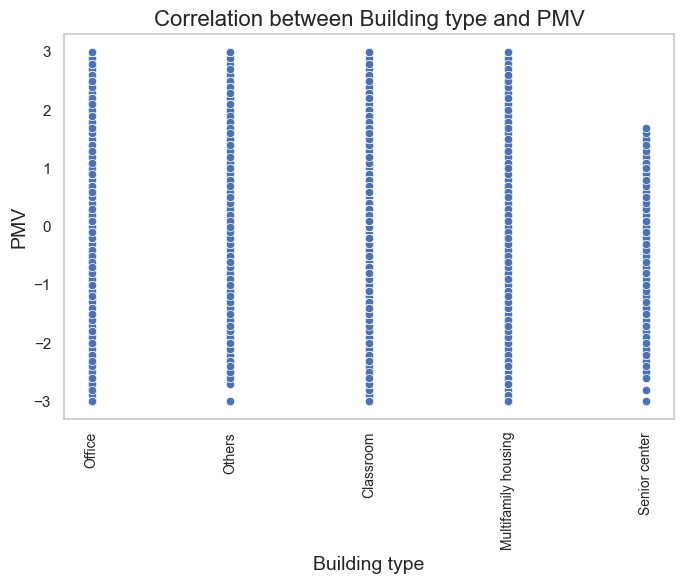

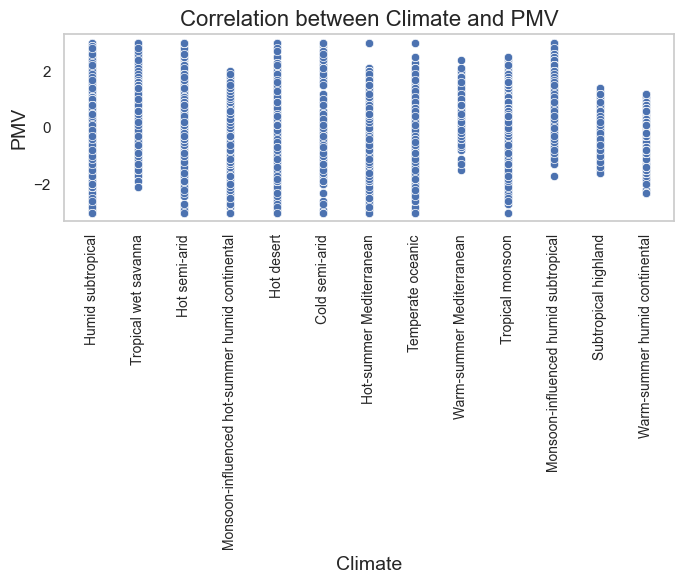

In [ ]:

for feature in input_vars:
    plt.figure(figsize=(7, 6))  # bigger figure for categorical vars
    sns.scatterplot(data=df, x=feature, y='PMV',)
    
    # Rotate x labels for categorical variables
    if df[feature].dtype == 'object' or df[feature].dtype.name == 'category':
        plt.xticks(rotation=90, fontsize=10, ha="center")
    else:
        plt.xticks(rotation=0, fontsize=10)
    
    plt.title(f"Correlation between {feature} and PMV", fontsize=16)
    plt.xlabel(feature, fontsize=14)
    plt.ylabel('PMV', fontsize=14)
    plt.grid(False)
    plt.tight_layout()
    plt.show()

###  Boxplots for input features

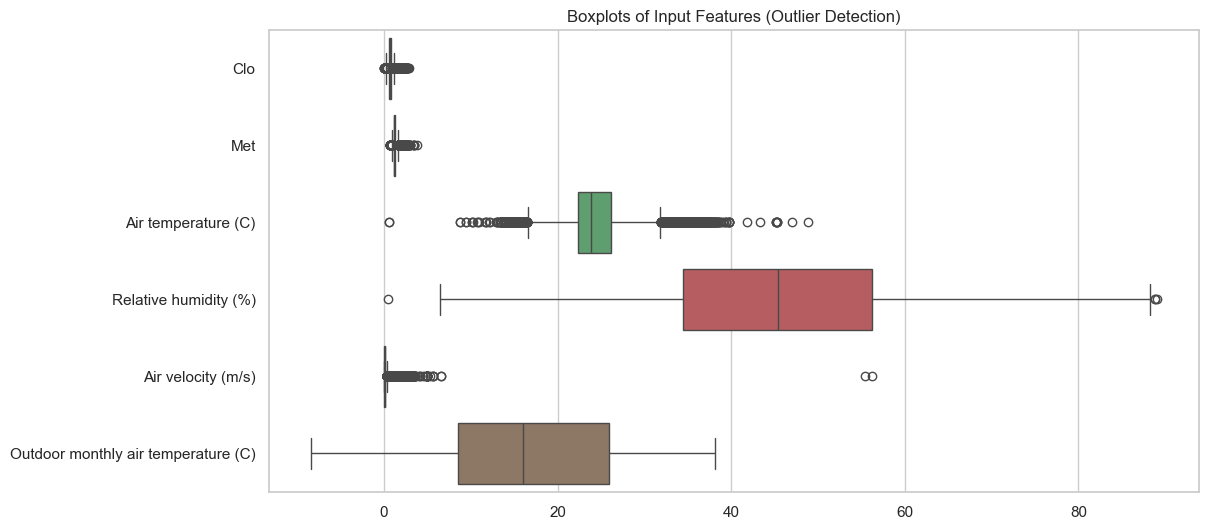

In [ ]:

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[input_vars], orient="h")
plt.title("Boxplots of Input Features (Outlier Detection)")
plt.show()

In [22]:
axis_limits = {
    'Air temperature (C)': {'x': (0, 50), 'y': (0, 2500)},
    'Relative humidity (%)': {'x': (0, 100), 'y': (0, 2000)},
    'Air velocity (m/s)': {'x': (0, 1.75), 'y': (0, 5000)},
    'Outdoor monthly air temperature (C)': {'x': (0, 50), 'y': (0, 10000)},
    'Clo': {'x': (0, 2.5), 'y': (0, 4000)},
    'Met': {'x': (.5, 2.5), 'y': (0, 20000)},
    'PMV': {'x': (-5, 5), 'y': (0, 3000)},
    'Season': {'x': (0, 5), 'y': (0, 25000)},
    'Climate': {'x': (0, 15), 'y': (0, 25000)},
    'Building type': {'x': (0,6), 'y': (0, 35000)}
}


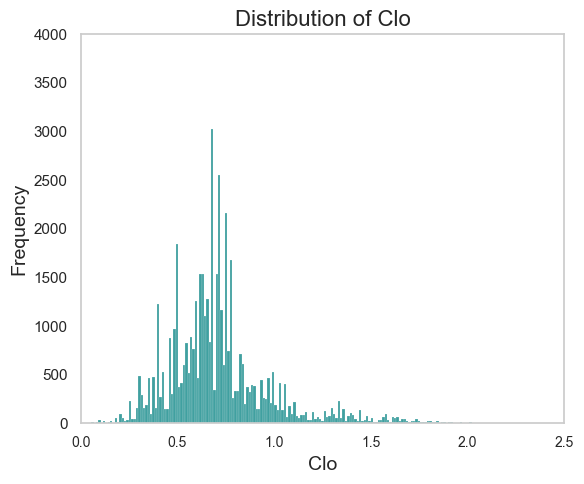

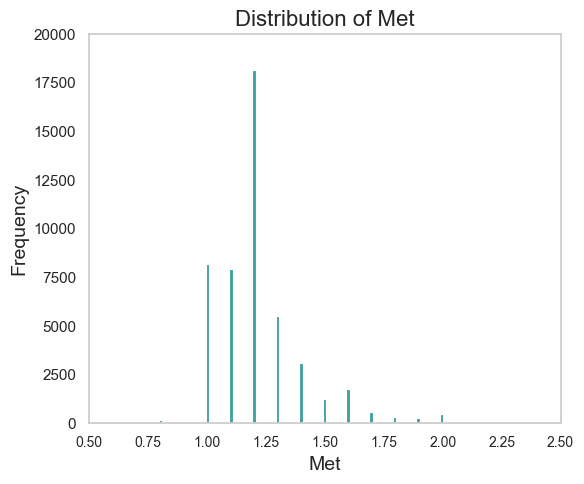

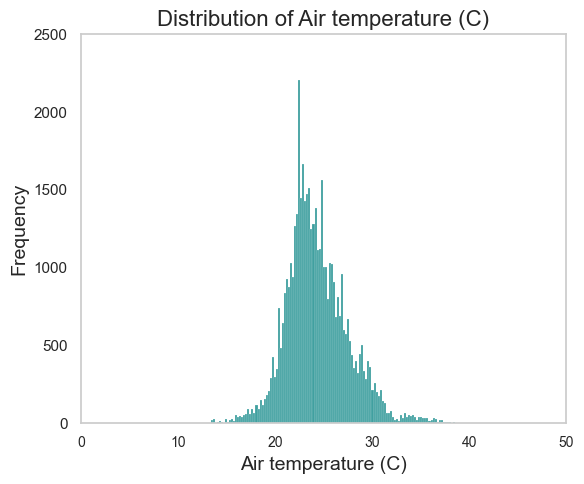

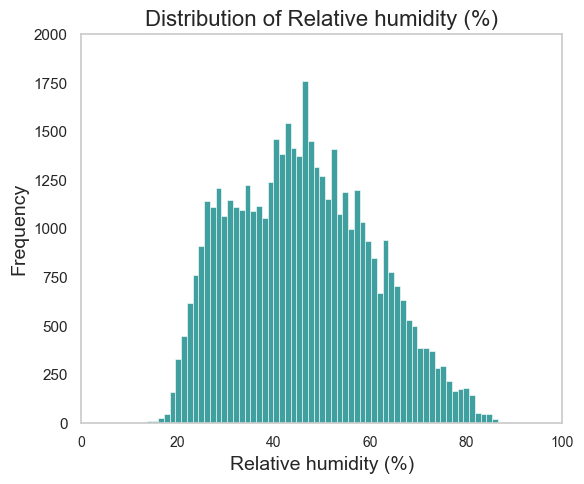

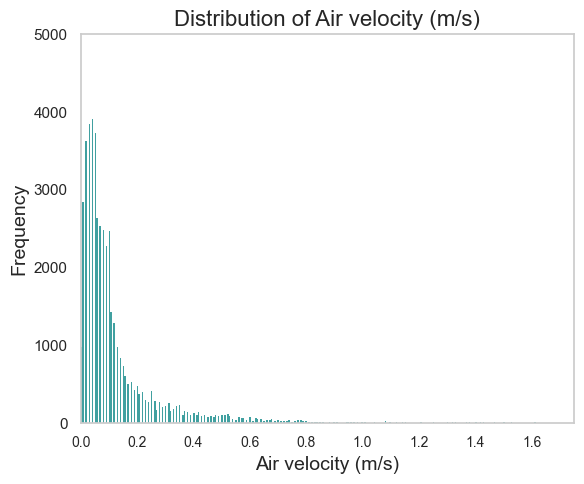

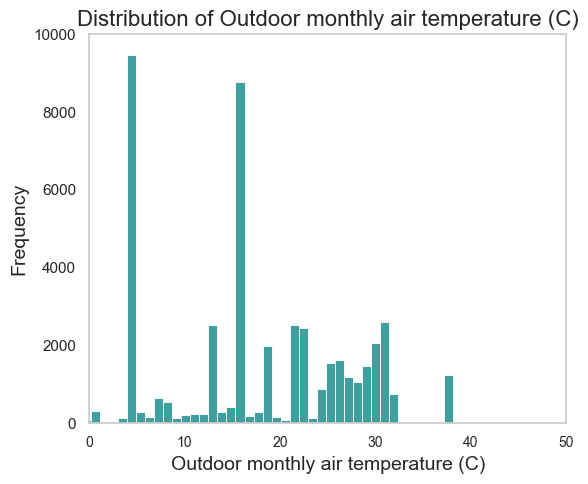

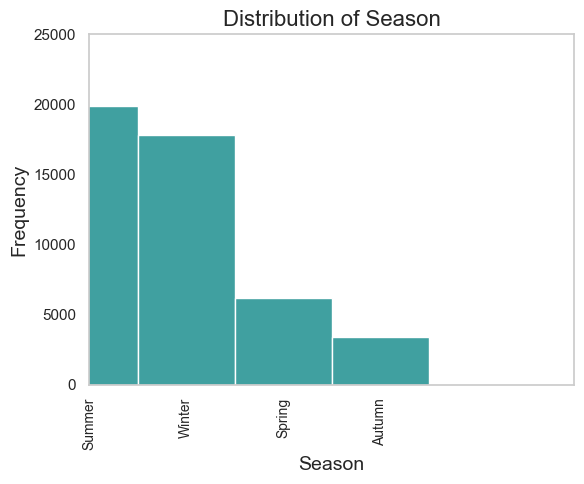

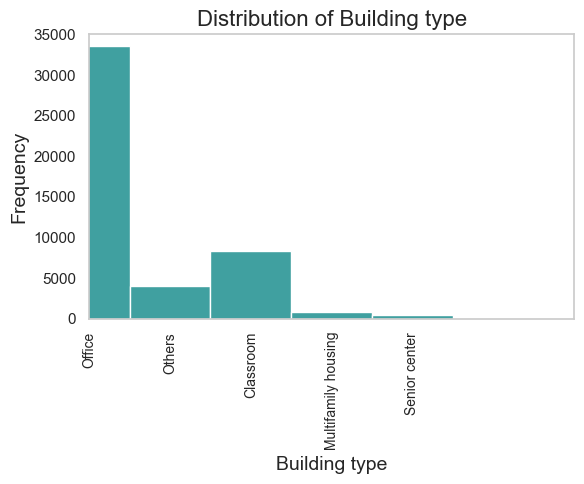

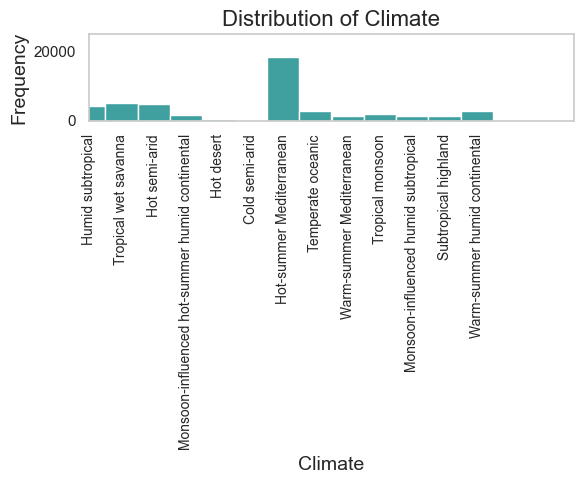

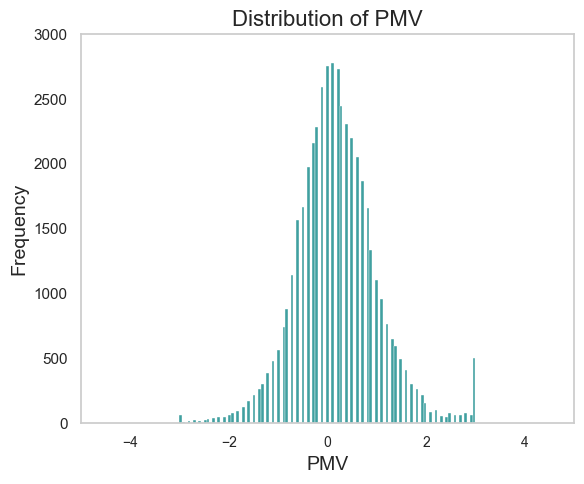

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

features = input_vars + ['PMV']

for feature in features:
    plt.figure(figsize=(6, 5))  # bigger figure for clarity
    sns.histplot(df[feature], kde=False, color='teal')

    # Rotate x labels if it's categorical
    if df[feature].dtype == 'object' or df[feature].dtype.name == 'category':
        plt.xticks(rotation=90, fontsize=10, ha="center")  # vertical labels for clarity
    else:
        plt.xticks(rotation=0, fontsize=10)

    # Set x and y limits if available
    if feature in axis_limits:
        plt.xlim(axis_limits[feature]['x'])
        plt.ylim(axis_limits[feature]['y'])

    plt.title(f"Distribution of {feature}", fontsize=16)
    plt.xlabel(feature, fontsize=14)
    plt.ylabel("Frequency", fontsize=14)
    plt.grid(False)
    plt.tight_layout()
    plt.show()




### Jointplots for key relationships with PMV

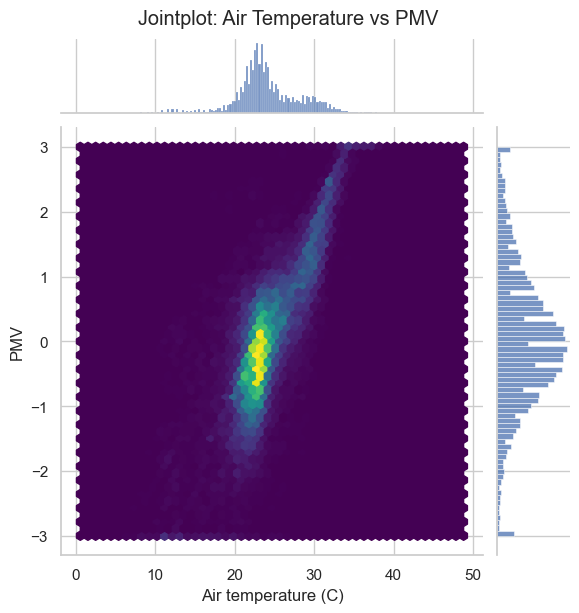

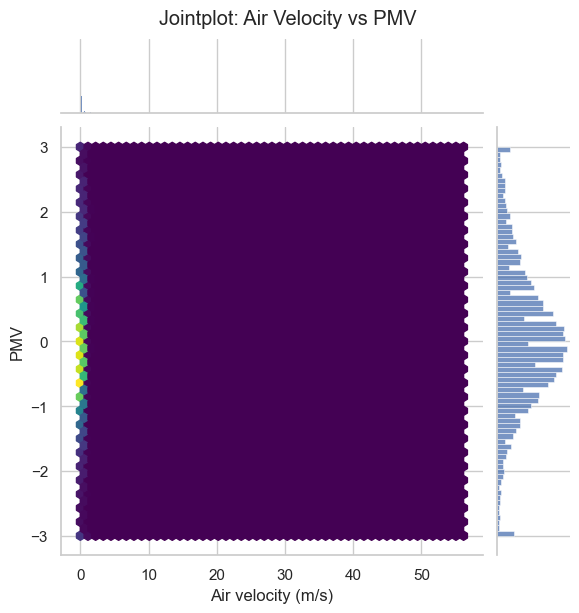

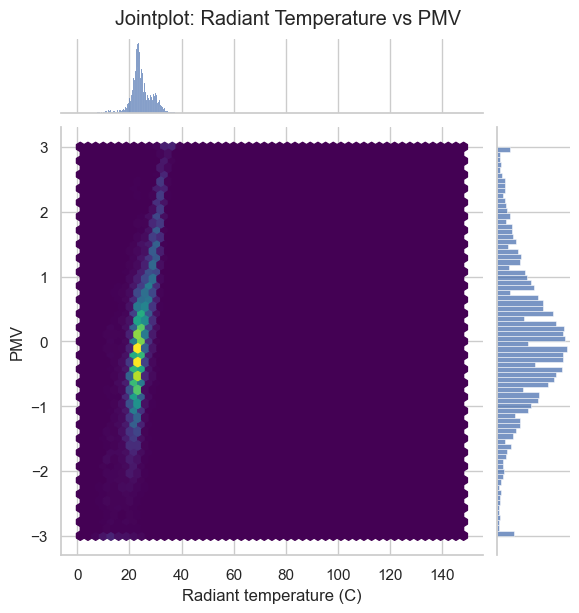

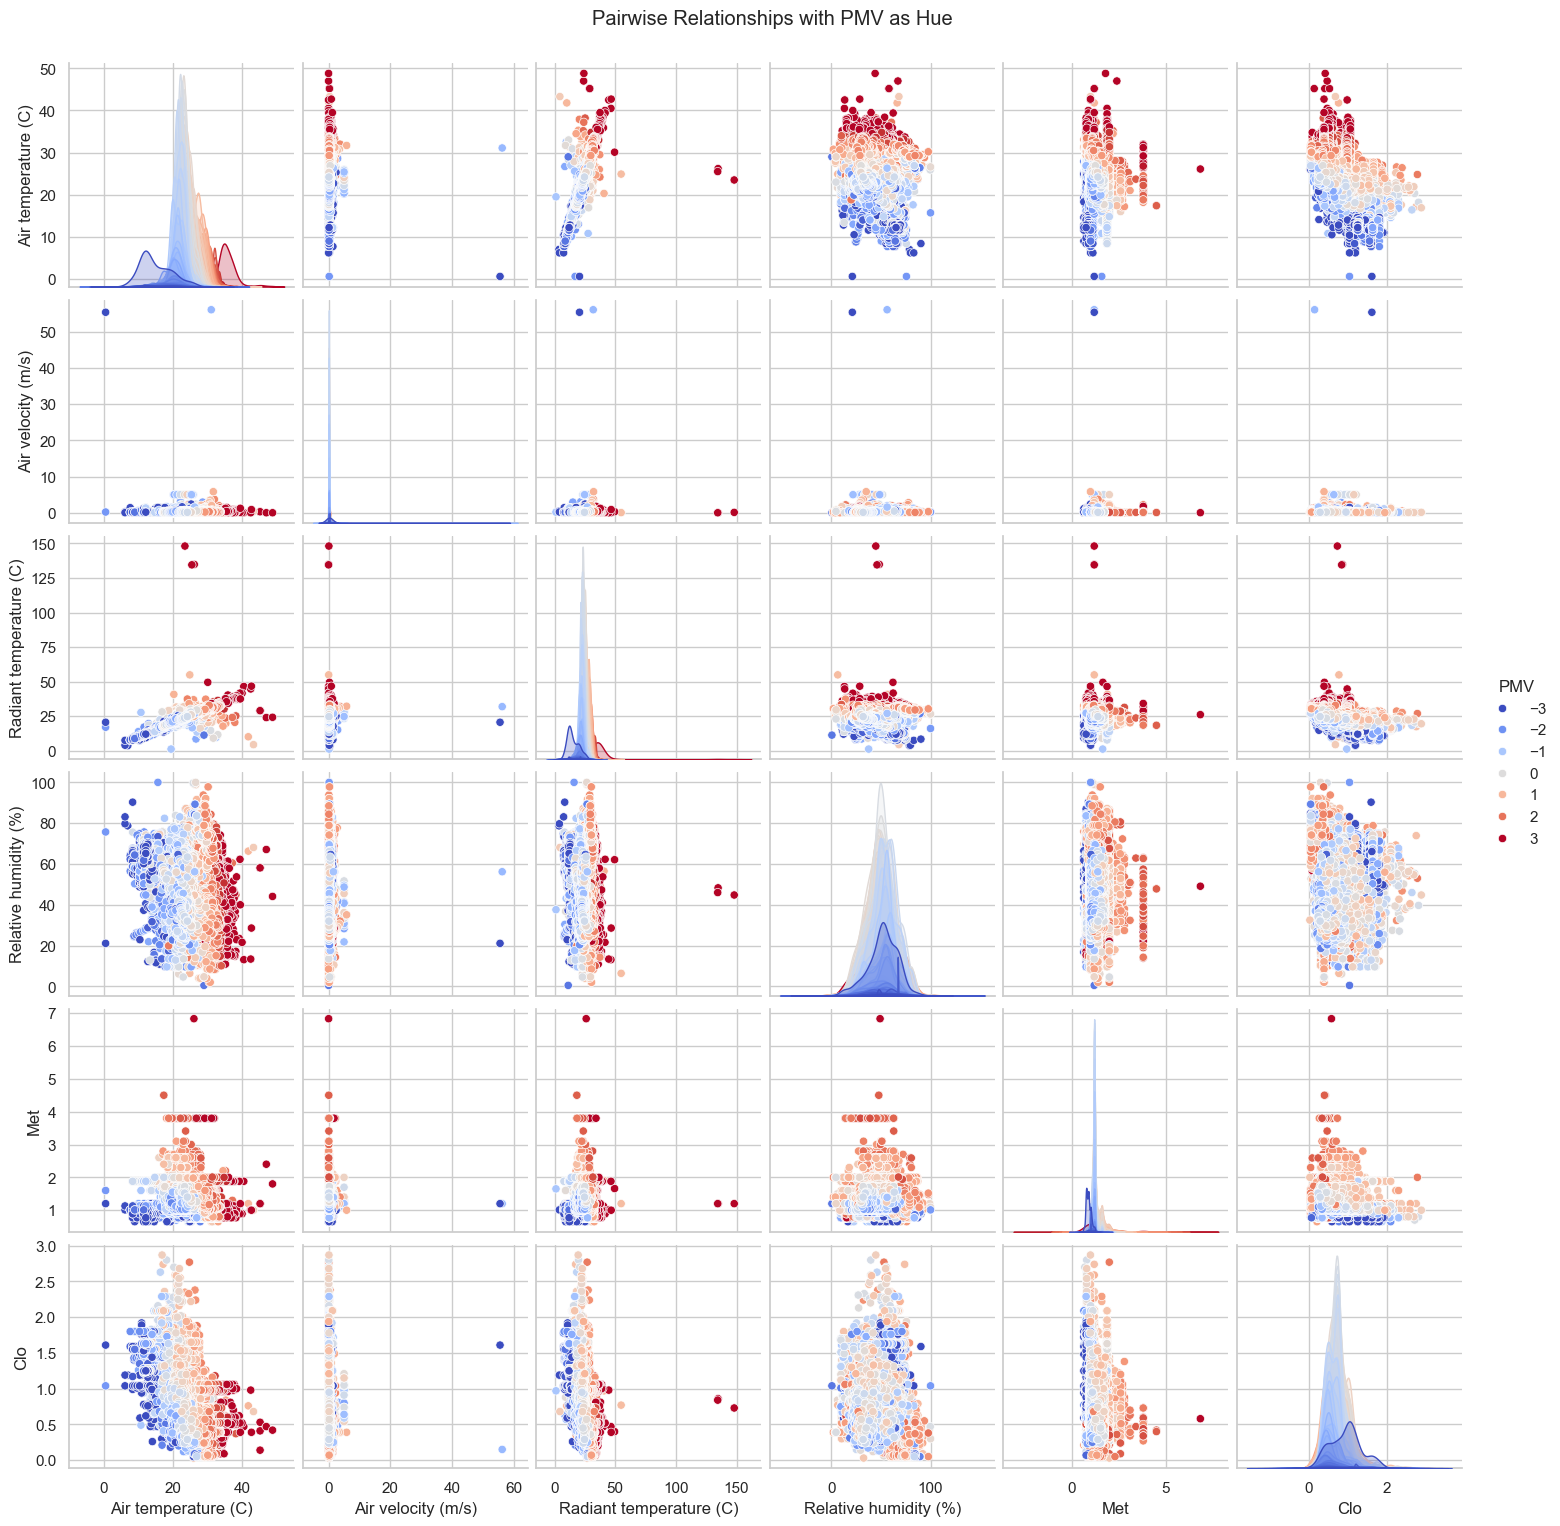

In [ ]:

sns.jointplot(data=df, x='Air temperature (C)', y='PMV', kind='hex', cmap='viridis')
plt.suptitle("Jointplot: Air Temperature vs PMV", y=1.02)
plt.show()

sns.jointplot(data=df, x='Air velocity (m/s)', y='PMV', kind='hex', cmap='viridis')
plt.suptitle("Jointplot: Air Velocity vs PMV", y=1.02)
plt.show()

sns.jointplot(data=df, x='Radiant temperature (C)', y='PMV', kind='hex', cmap='viridis')
plt.suptitle("Jointplot: Radiant Temperature vs PMV", y=1.02)
plt.show()

# Pairplot with PMV hue
sns.pairplot(df, vars=input_vars, hue='PMV', palette='coolwarm')
plt.suptitle("Pairwise Relationships with PMV as Hue", y=1.02)
plt.show()
